# CM4_Project4 by Marshal Pfluger
### Dr. Sajjad Mohsin

#### I started off by running the necessary commands to load the dataset from kaggle. I commented these out so that it will not run again every time I restart the kernel and run again. I only needed to get the API token from my account at kaggle and upload it here as a json file. I ended up stopping using this method as with google colab it deletes all of the files when you disconnect and I kept having issues accessing the dataset. I opted to download the file to my machine and upload it from there each time. To upload the file to use in collab, I have attatched the file for this notebook. On the left side of the window there is the runtime file system. click on the file system icon to see the full file system. Then right click the "contect" folder and select upload. select the dataset and that will allow the notebook to run the dataset

In [1]:
# dont use this ! pip install kaggle

In [2]:
# dont use this ! mkdir ~/.kaggle

In [3]:
# dont use this ! cp kaggle.json ~/.kaggle

In [4]:
# dont use this !chmod 600 ~/.kaggle/kaggle.json

In [5]:
# dont use this ! kaggle datasets download berkeleyearth/climate-change-earth-surface-temperature-data

In [6]:
# dont use this ! unzip climate-change-earth-surface-temperature-data

### Here is where the project actually starts.

In [7]:
# Here we will import the needed libraries for this projecy
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# We need keras
import keras

import numpy as np

import pandas as pd

# set seed for reproducible resuts
tf.random.set_seed(12)

#### Here we will load the dataset from our colab file system

In [8]:
dataset = pd.read_csv('/content/GlobalTemperatures.csv', parse_dates=['dt'])
dataset.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


#### Most of the columns contain null values so we will remove them. this will leave us with the columns with non null data entries. I played around a lot with what data I wanted to keep and run my model with. I first used the landaveragetemperature and landaveragetemperatureuncertainty. I dont think the uncertainty helped the model at all. I then chose to look at the landaverageTemperature only. I then tried to create a new datset with the average annual temperature for each year instead to try to predict the next annual temperatures. To do this I used panda functions to manipulate and calulate the averages for each year.

In [9]:
# Make a copy of the original dataset
datasetCopy = dataset.copy()
# Remove the colums we are not going to use
datasetCopy.drop(datasetCopy.columns[2:], axis=1, inplace=True)
# Remove the columns that are all null values
datasetCopy.dropna(inplace=True)
# Make the date column the index and sort by this value
datasetCopy = datasetCopy.set_index("dt")
# Parse the dt date column
pd.to_datetime(datasetCopy.index)

DatetimeIndex(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01',
               '1750-05-01', '1750-06-01', '1750-07-01', '1750-08-01',
               '1750-09-01', '1750-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', length=3180, freq=None)

In [10]:
# Display the first few values of the processed dataset
datasetCopy.head(11)

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
1750-06-01,12.937
1750-07-01,15.868
1750-08-01,14.750
1750-09-01,11.413


In [11]:
# Check to make sure there are no null values in the dataset
datasetCopy.isnull().sum()

LandAverageTemperature    0
dtype: int64

In [12]:
# I also want to make a dataset with only the average of each year.
annual_averages = datasetCopy.resample('Y').mean()
annual_datset = pd.DataFrame(annual_averages, columns=datasetCopy.columns)
annual_datset.tail()

,LandAverageTemperature
dt,
2011-12-31,9.516000
2012-12-31,9.507333
2013-12-31,9.606500
2014-12-31,9.570667
2015-12-31,9.831000


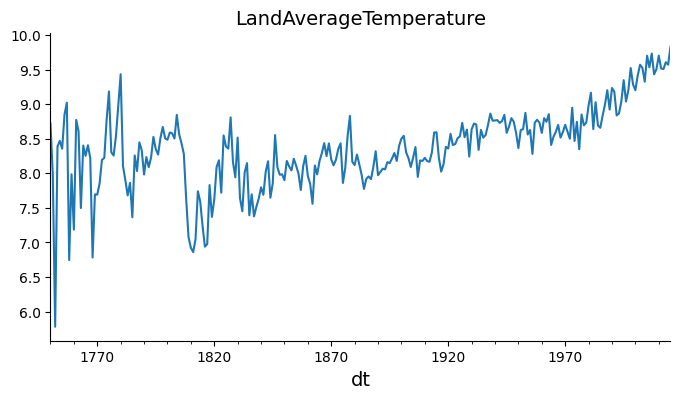

In [13]:
# annuatized dataset plot
from matplotlib import pyplot as plt
annual_datset['LandAverageTemperature'].plot(kind='line', figsize=(8, 4), title='LandAverageTemperature')
plt.gca().spines[['top', 'right']].set_visible(False)

#### After seeing the annuatized land average temperature, I feel like this will offer more meaningful predictions

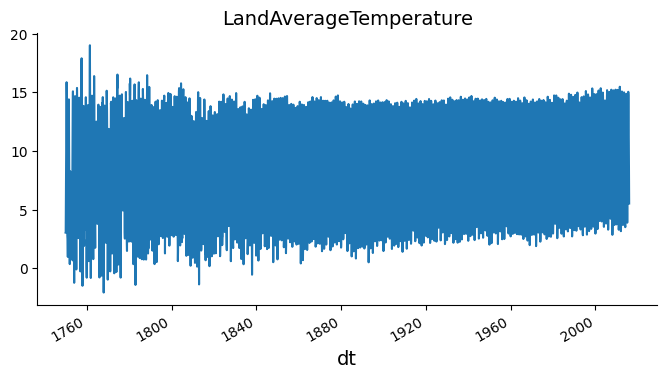

In [14]:
# non annuatized dataset plot
from matplotlib import pyplot as plt
datasetCopy['LandAverageTemperature'].plot(kind='line', figsize=(8, 4), title='LandAverageTemperature')
plt.gca().spines[['top', 'right']].set_visible(False)

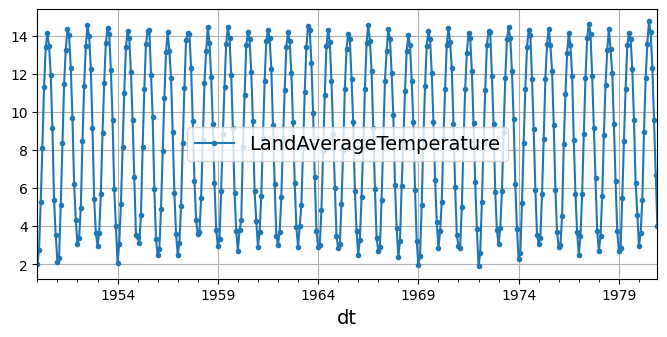

In [15]:
# We will visualize some of the data
datasetCopy["1950-01":"1980-12"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

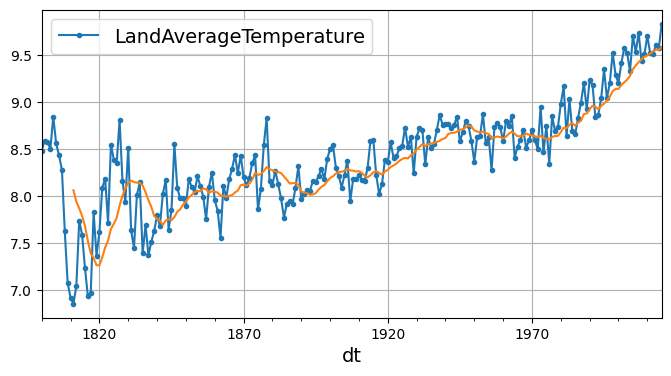

In [16]:
period = slice("1800", "2015")
df_monthly = annual_datset.resample('Y').mean()  # compute the mean for each month
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
plt.show()

#### As we have seen from the plot, the land average temperature has been trending up and is rising faster towards the end. The uncertainty is also lowering because more accurate reporting took place as time went on.

In [17]:
# we will get the modules to use the ARIMA model
if "google.colab" in sys.modules:
    %pip install -q -U statsmodels

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# We will check the ARIMA to forcast the for the date we select
origin, today = "1750-02-01", "2015-05-01"
temp_series = datasetCopy.loc[origin:today]["LandAverageTemperature"].asfreq("MS")
model = ARIMA(temp_series,
              order=(1, 0, 0))
model = model.fit()
y_pred = model.forecast()

In [19]:
y_pred[0]  # ARIMA forecast

11.714442799733792

#### As we can see the ARIMA gave us a very accuate forcast of 2015-05-01

### Now we will buld Deep RNN models to see how accurate we can get

In [20]:
# We will make some training and validation dataset to train the models and scale them down
meanTemp_train = datasetCopy["LandAverageTemperature"]["1750-01":"1900-12"] / 100
meanTemp_valid = datasetCopy["LandAverageTemperature"]["1901-01":"2015-12"] / 100

In [21]:
# We are now making a time series for the training and validation dataset.
seq_length = 11
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    meanTemp_train.to_numpy(),
    targets=meanTemp_train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=12
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    meanTemp_valid.to_numpy(),
    targets=meanTemp_valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [22]:
# We will reset the model
keras.backend.clear_session()
np.random.seed(12)
tf.random.set_seed(12)

In [23]:
# Building the model with SImpleRNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

In [24]:
# Implement early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=50, restore_best_weights=True)
# Set our optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
# Compile the model
model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
# Train the model
history = model.fit(train_ds, validation_data=valid_ds, epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
56/56 [==============================] - 22s 111ms/step - loss: 4.5470e-04 - mae: 0.0221 - val_loss: 3.9936e-05 - val_mae: 0.0074
Epoch 2/100
56/56 [==============================] - 4s 77ms/step - loss: 1.6947e-04 - mae: 0.0129 - val_loss: 3.7828e-05 - val_mae: 0.0071
Epoch 3/100
56/56 [==============================] - 4s 74ms/step - loss: 1.6702e-04 - mae: 0.0131 - val_loss: 2.1019e-05 - val_mae: 0.0053
Epoch 4/100
56/56 [==============================] - 4s 65ms/step - loss: 1.3880e-04 - mae: 0.0117 - val_loss: 9.1251e-05 - val_mae: 0.0122
Epoch 5/100
56/56 [==============================] - 3s 52ms/step - loss: 1.2837e-04 - mae: 0.0112 - val_loss: 2.5706e-05 - val_mae: 0.0058
Epoch 6/100
56/56 [==============================] - 2s 38ms/step - loss: 1.3403e-04 - mae: 0.0118 - val_loss: 3.7103e-05 - val_mae: 0.0072
Epoch 7/100
56/56 [==============================] - 3s 52ms/step - loss: 1.1418e-04 - mae: 0.0105 - val_loss: 2.2673e-05 - val_mae: 0.0055
Epoch 8/100
56/56 

In [25]:
# Evaluate the models performance with the MAE
valid_loss, valid_mae = model.evaluate(valid_ds)
valid_mae * 100

43/43 [==============================] - 0s 8ms/step - loss: 2.6706e-05 - mae: 0.0061


0.6132808048278093

#### As we can see, we got a low mean absolute error which is promising

#### Even though we got a decently low MAE from the first dataset, I want to see what will happen with our annuatized dataset.

In [26]:
# We will reset the model
keras.backend.clear_session()
np.random.seed(12)
tf.random.set_seed(12)

In [27]:
## Make new datasets for this new model
meanTemp_train2 = annual_datset["LandAverageTemperature"]["1850-12":"1950-12"] / 100
meanTemp_valid2 = annual_datset["LandAverageTemperature"]["1951-12":"2010-12"] / 100
meanTemp_test2 = annual_datset["LandAverageTemperature"]["1970-12":"2015-12"] / 100

In [28]:
# Create time series for the new model
seq_length = 11
train_ds2 = tf.keras.utils.timeseries_dataset_from_array(
    meanTemp_train2.to_numpy(),
    targets=meanTemp_train2[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=12
)
valid_ds2 = tf.keras.utils.timeseries_dataset_from_array(
    meanTemp_valid2.to_numpy(),
    targets=meanTemp_valid2[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)


In [29]:
# Building the deep simpleRNN model
model_2 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

In [30]:
# Implement early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=30, restore_best_weights=True)
# Set our optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.013)
# Compile the model
model_2.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
# Train the model
history = model_2.fit(train_ds2, validation_data=valid_ds2, epochs=500, callbacks=[early_stopping_cb])

Epoch 1/500
3/3 [==============================] - 3s 249ms/step - loss: 0.9088 - mae: 1.2514 - val_loss: 0.4119 - val_mae: 0.9076
Epoch 2/500
3/3 [==============================] - 0s 70ms/step - loss: 0.2830 - mae: 0.7173 - val_loss: 0.0016 - val_mae: 0.0557
Epoch 3/500
3/3 [==============================] - 0s 67ms/step - loss: 0.0449 - mae: 0.2477 - val_loss: 0.0048 - val_mae: 0.0980
Epoch 4/500
3/3 [==============================] - 0s 136ms/step - loss: 0.0054 - mae: 0.0961 - val_loss: 0.0147 - val_mae: 0.1715
Epoch 5/500
3/3 [==============================] - 0s 116ms/step - loss: 0.0092 - mae: 0.1259 - val_loss: 8.2740e-04 - val_mae: 0.0405
Epoch 6/500
3/3 [==============================] - 0s 119ms/step - loss: 0.0035 - mae: 0.0766 - val_loss: 0.0046 - val_mae: 0.0954
Epoch 7/500
3/3 [==============================] - 0s 91ms/step - loss: 0.0017 - mae: 0.0509 - val_loss: 0.0020 - val_mae: 0.0635
Epoch 8/500
3/3 [==============================] - 0s 72ms/step - loss: 0.0030 - m

In [31]:
# Evaluate the model performance
valid_loss, valid_mae = model_2.evaluate(valid_ds2)
valid_mae * 100

2/2 [==============================] - 0s 11ms/step - loss: 7.8979e-06 - mae: 0.0035


0.3451334545388818

#### The annuatized model definetely performed better than the model with monthly data

In [32]:
# Us the validation time series to make predictions
predicted_values = model_2.predict(valid_ds2)
print("Predicted values:", predicted_values * 100)

2/2 [==============================] - 0s 11ms/step
Predicted values: [[9.035613 ]
 [9.096521 ]
 [9.107757 ]
 [9.062789 ]
 [9.018818 ]
 [9.033707 ]
 [9.090066 ]
 [9.076752 ]
 [9.033621 ]
 [9.047312 ]
 [9.094935 ]
 [9.108869 ]
 [9.071941 ]
 [9.0413885]
 [9.053178 ]
 [9.068583 ]
 [9.06312  ]
 [9.066844 ]
 [9.060645 ]
 [9.045322 ]
 [9.025984 ]
 [9.071389 ]
 [9.070717 ]
 [9.050933 ]
 [9.050095 ]
 [9.037521 ]
 [9.041256 ]
 [9.015283 ]
 [9.029015 ]
 [9.065541 ]
 [9.070783 ]
 [9.070937 ]
 [9.07245  ]
 [9.016551 ]
 [9.018429 ]
 [9.028484 ]
 [9.023989 ]
 [9.027633 ]
 [9.061103 ]
 [9.0950985]
 [9.039556 ]
 [9.002156 ]
 [9.016519 ]
 [9.027842 ]
 [9.0099125]
 [9.009004 ]
 [9.052828 ]
 [9.046785 ]
 [8.996073 ]]


#### This project has been the most challanging for me so far. Ultimately I feel that I have learned alot about working with models and trying to adjust parameters to tweak what the model is doing. I feel though that I still have a lot to learn. As we have learned throughout class, there are many nuances that can change the output of our models and it can take a lot of time to manipulate things to get what we are looking for. In the end I feel that I researched a significant amount and got my models pretty accurate. I also learned many things that will help me in future projects.